In [26]:
import numpy as np
import matplotlib.pyplot as plt

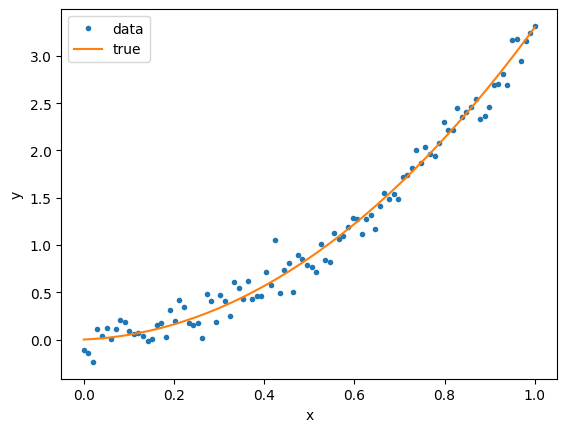

In [27]:
# model y = h(x) + noise
def dataset_generation(M):
  x = np.linspace(0,1,M)
  h = np.polyval([0.1, 3 ,0.2, 0.001],x)
  y = h + 1.2*np.random.normal(0,0.1,M)
  return (x,y,h)

x, y, h = dataset_generation(100)
plt.plot(x,y,'.',label='data')
plt.plot(x,h,label='true')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

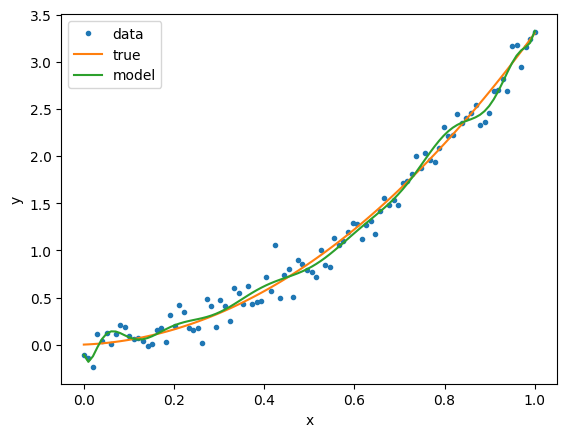

In [28]:
# polynomial model
N = 15
X = np.vander(x,N+1,increasing=True)
w = np.linalg.lstsq(X,y)[0]
yh = X @ w

plt.plot(x,y,'.',label='data')
plt.plot(x,h,label='true')
plt.plot(x,yh,label='model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
x_test, y_test, h = dataset_generation(100)
se = np.sum((y_test-yh)**2)
print(se)

1.3538101926456798


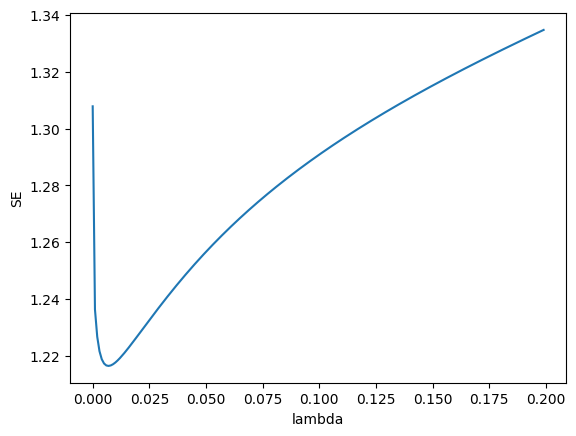

In [36]:
# L2 regularization
X = np.vander(x,N+1,increasing=True)
se = []
lambda_range = np.arange(0,0.2,0.001)
for lambda_reg in lambda_range:
  I = np.eye(N+1)
  I[0,0] = 0
  w = np.linalg.lstsq(X.T@X+lambda_reg*I,X.T@y)[0]
  yh = X @ w
  se.append(np.sum((y_test-yh)**2))

plt.plot(lambda_range,se)
plt.xlabel('lambda')
plt.ylabel('SE')
plt.show()